In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test =X_test.astype('float32')/255.0
X_train =X_train.astype('float32')/255.0

In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [ ]:
# Add Gaussian noise to the images
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip the values to be in the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# Define the denoising autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, X_test))

Epoch 1/50
235/235 [==============================] - 5s 19ms/step - loss: 0.2373 - val_loss: 0.1708
Epoch 2/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1547 - val_loss: 0.1401
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1343 - val_loss: 0.1274
Epoch 4/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1251 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1200 - val_loss: 0.1179
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1172 - val_loss: 0.1156
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1153 - val_loss: 0.1145
Epoch 8/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1139 - val_loss: 0.1133
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1128 - val_loss: 0.1126
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1119 - val_lo

In [ ]:
encoder = Model(input_img, encoded)

In [ ]:
denoised_images = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


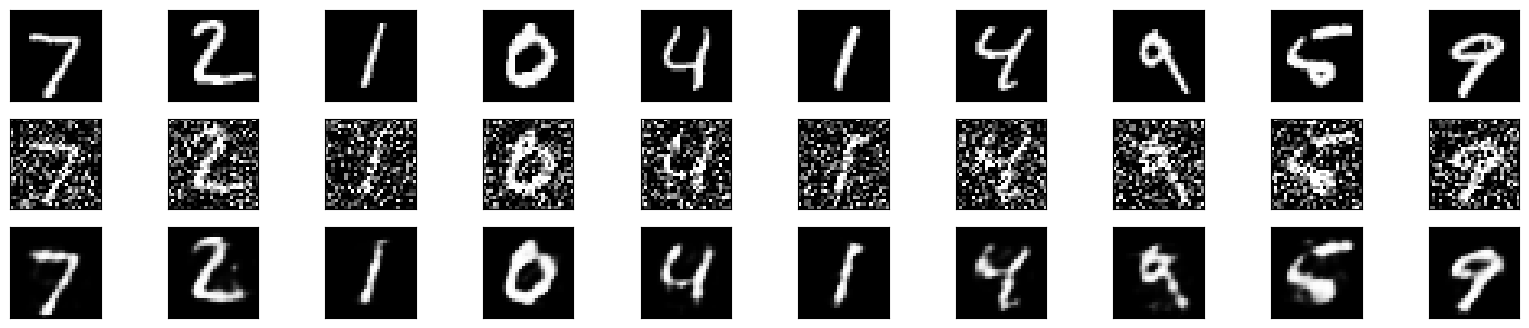

In [ ]:
# You can visualize the original, noisy, and denoised images to see the results.
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()